# OSE-Summer School 2019
## Wk5: Computation, Pandas 3 lab

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pydataset import data

### Problem 1. "iris"

In [2]:
iris = data("iris")
iris.sample(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
58,4.9,2.4,3.3,1.0,versicolor
66,6.7,3.1,4.4,1.4,versicolor
131,7.4,2.8,6.1,1.9,virginica
65,5.6,2.9,3.6,1.3,versicolor
20,5.1,3.8,1.5,0.3,setosa


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde9ecb7d30>,
      dtype=object)

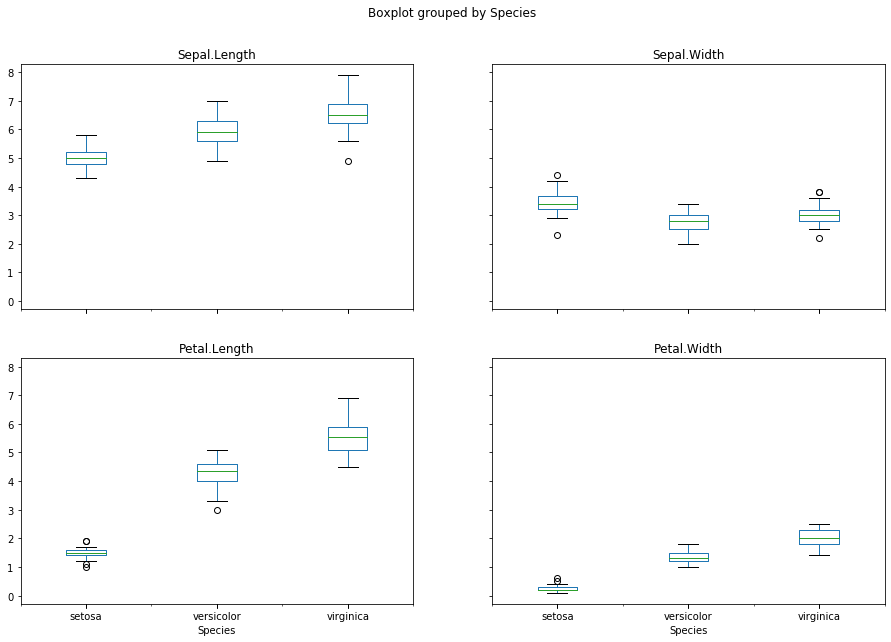

In [3]:
iris.boxplot(["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"], 
             by="Species", grid=False, figsize=[15,10])

The setosa is the easiest to distinguish from the others because its petal length and width are much smaller than others. I will compare petal length and width to identify the flower's species.

### Problem 1. "poisons"

In [4]:
poisons = data("poisons")
poisons.sample(5)

,time,poison,treat
9,0.22,3,A
37,0.45,1,D
15,0.88,1,B
25,0.43,1,C
12,0.23,3,A


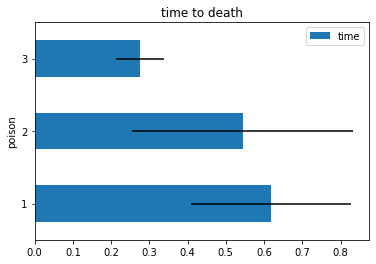

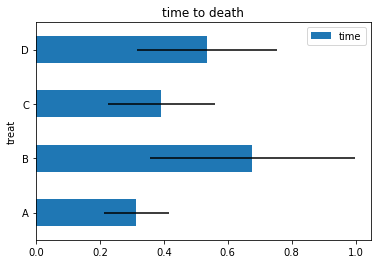

In [5]:
poison = poisons.groupby("poison")
treat = poisons.groupby("treat")

poison[["time"]].mean().plot(kind="barh", xerr=poison.std(), title="time to death")
treat[["time"]].mean().plot(kind="barh", xerr=treat.std(), title="time to death")

'Poison 3' is the most deadly and 'treatment B' is the most effective.

Text(0, 0.5, 'time to death')

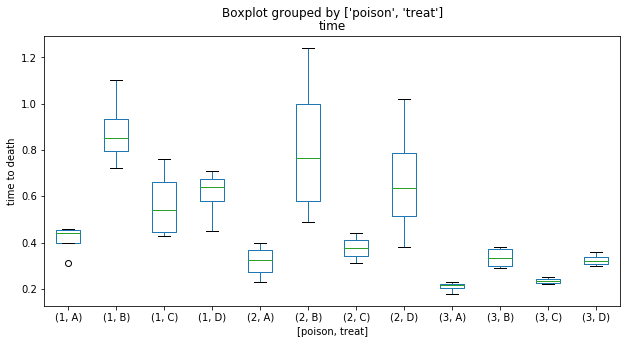

In [6]:
poisons.boxplot(["time"], by=["poison","treat"], grid=False, figsize=[10,5])
plt.ylabel("time to death")

I would choose the treatment B because it seems the most effective for all types of poisons.

### Problem 1. "diamonds"

In [7]:
diamonds = data("diamonds")
diamonds.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
5983,0.72,Very Good,F,VVS2,59.2,63.0,3952,5.77,5.86,3.44
26167,1.21,Ideal,F,IF,62.8,56.0,15497,6.75,6.84,4.27
34606,0.27,Very Good,D,VS1,63.2,55.0,470,4.10,4.16,2.61
2670,0.76,Very Good,F,VS2,62.5,58.0,3238,5.79,5.83,3.63
5194,0.91,Good,G,SI1,63.5,61.0,3776,6.05,6.10,3.86


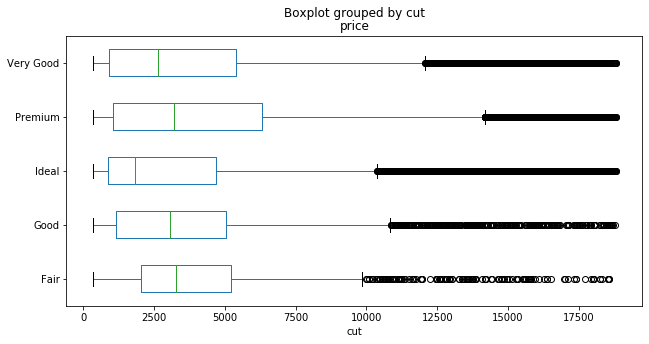

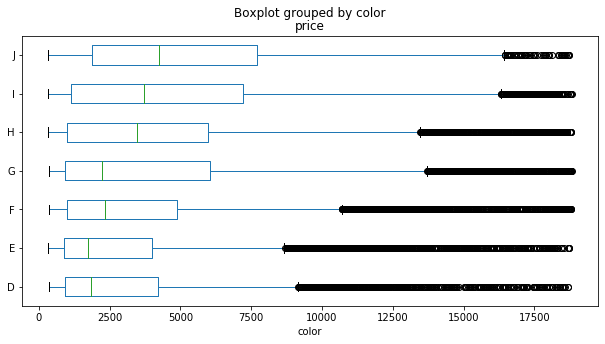

In [8]:
diamonds.boxplot(["price"], by="cut", grid=False, vert=False, figsize=[10,5])
diamonds.boxplot(["price"], by="color", grid=False, vert=False, figsize=[10,5])

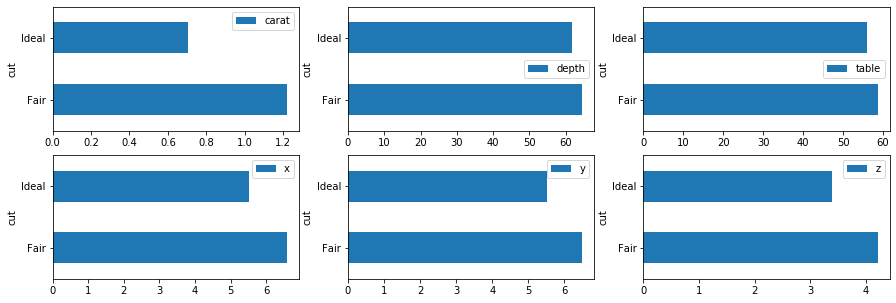

In [9]:
color_H = diamonds[(diamonds["color"]=="H") & (diamonds["cut"]=="Fair") | (diamonds["cut"]=="Ideal")]
H_Fair_Ideal = color_H.groupby("cut")

fig, ax = plt.subplots(2, 3, figsize=(15, 5))
H_Fair_Ideal[["carat"]].mean().plot(kind="barh", ax=ax[0,0])
H_Fair_Ideal[["depth"]].mean().plot(kind="barh", ax=ax[0,1])
H_Fair_Ideal[["table"]].mean().plot(kind="barh", ax=ax[0,2])
H_Fair_Ideal[["x"]].mean().plot(kind="barh", ax=ax[1,0])
H_Fair_Ideal[["y"]].mean().plot(kind="barh", ax=ax[1,1])
H_Fair_Ideal[["z"]].mean().plot(kind="barh", ax=ax[1,2])

The diamonds with a "Fair" cut are bigger than those with a "Ideal" cut on average.